# Data retrieval

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
url = 'https://www.inshorts.com/en/read/world'

In [3]:
news_category = url.split('/')
news_category

['https:', '', 'www.inshorts.com', 'en', 'read', 'world']

In [4]:
news_category = news_category[-1]

In [5]:
data = requests.get(url)
data

<Response [200]>

In [6]:
soup = BeautifulSoup(data.text, 'html')

In [7]:
url = 'https://www.inshorts.com/en/read/world'

news_data = []
news_category = url.split('/')[-1]

data = requests.get(url)
soup = BeautifulSoup(data.text, 'html')


headers = {'User-Agent': 'Mozilla/5.0'}

try:
    updated_news_data = []

    for card in soup.find_all('div', class_='LUWdd1C_3UqqulVsopn0'):  
        headline = card.find('span', itemprop='headline')
        headline_text = headline.text.strip() if headline else "No headline found"
        
        article_body = card.find('div', itemprop='articleBody')
        article_text = article_body.text.strip() if article_body else "No article found"

        news_article = {
            'news_headline': headline_text,
            'news_category': news_category,
            'news_article': article_text
        }
        updated_news_data.append(news_article)

except requests.exceptions.RequestException as e:
    print("Error during requests to {0} : {1}".format(url, str(e)))

news_data.extend(updated_news_data)
df = pd.DataFrame(news_data)
df.head()

,news_headline,news_category,news_article
0,"Man digs up uncle's bones, uses them to extort...",world,A 37-year-old man was arrested after he allege...
1,Trump assassination attempt accused's son arre...,world,Son of the man accused of attempting to assass...
2,BSF lodges protest with B'desh over jawan's ki...,world,The BSF lodged a strong protest with the Borde...
3,Several detained after suspected death of pers...,world,Several people have been detained and a crimin...
4,"'No one is dying under my watch,' Boss of firm...",world,"OceanGate CEO Stockton Rush, who died when the..."


In [8]:
df = df[['news_headline', 'news_article', 'news_category']]

In [9]:
df.head(3)

,news_headline,news_article,news_category
0,"Man digs up uncle's bones, uses them to extort...",A 37-year-old man was arrested after he allege...,world
1,Trump assassination attempt accused's son arre...,Son of the man accused of attempting to assass...,world
2,BSF lodges protest with B'desh over jawan's ki...,The BSF lodged a strong protest with the Borde...,world


In [10]:
df.shape

(10, 3)

# Prepare user defined function to extract data from inshorts.com

In [11]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [12]:
url = 'https://inshorts.com/en/read/technology'

news_data = []
news_category = url.split('/')[-1]

data = requests.get(url)
soup = BeautifulSoup(data.text, 'html')

headers = {'User-Agent': 'Mozilla/5.0'}

try:
    updated_news_data = []

    for card in soup.find_all('div', class_='LUWdd1C_3UqqulVsopn0'):  
        headline = card.find('span', itemprop='headline')
        headline_text = headline.text.strip() if headline else "No headline found"
        
        article_body = card.find('div', itemprop='articleBody')
        article_text = article_body.text.strip() if article_body else "No article found"

        news_article = {
            'news_headline': headline_text,
            'news_category': news_category,
            'news_article': article_text
        }
        updated_news_data.append(news_article)

except requests.exceptions.RequestException as e:
    print("Error during requests to {0} : {1}".format(url, str(e)))

news_data.extend(updated_news_data)
df1 = pd.DataFrame(news_data)
df1.head()

,news_headline,news_category,news_article
0,Apple's iPhone designer Jony Ive to make AI de...,technology,"Jony Ive, Apple's ex-chief design officer who ..."
1,Swedish EV battery maker Northvolt laying off ...,technology,"Northvolt, the Sweden-based EV battery maker w..."
2,US proposes ban on Chinese software in cars,technology,The US government has proposed to ban Chinese-...
3,Please forgive me: Musk on posting fake pic of...,technology,Elon Musk has apologised for sharing a fake pi...
4,Need more tariff hike: Vi CEO Moondra after ra...,technology,Vodafone Idea (Vi) CEO Akshaya Moondra said th...


In [13]:
url = 'https://inshorts.com/en/read/sports'

news_data = []
news_category = url.split('/')[-1]

data = requests.get(url)
soup = BeautifulSoup(data.text, 'html')

headers = {'User-Agent': 'Mozilla/5.0'}

try:
    updated_news_data = []

    for card in soup.find_all('div', class_='LUWdd1C_3UqqulVsopn0'):  
        headline = card.find('span', itemprop='headline')
        headline_text = headline.text.strip() if headline else "No headline found"
        
        article_body = card.find('div', itemprop='articleBody')
        article_text = article_body.text.strip() if article_body else "No article found"

        news_article = {
            'news_headline': headline_text,
            'news_category': news_category,
            'news_article': article_text
        }
        updated_news_data.append(news_article)

except requests.exceptions.RequestException as e:
    print("Error during requests to {0} : {1}".format(url, str(e)))

news_data.extend(updated_news_data)
df2 = pd.DataFrame(news_data)
df2.head()

,news_headline,news_category,news_article
0,Cheapest seat for adults for India-England Lor...,sports,The cheapest seat for adults for India and Eng...
1,"Kohli will not surpass Sachin's record of 15,9...",sports,Ex-Australia spinner Brad Hogg opined that ex-...
2,Ravindra Jadeja is a better batter than R Ashw...,sports,New Zealand's Martin Guptill said that Team In...
3,Ticket buyers of India-B'desh match anti-natio...,sports,Hindu Mahasabha's national vice-president Jaiv...
4,I have been asked to stop picking my kids up w...,sports,"England pacer Mark Wood, who has been ruled ou..."


In [14]:
url = 'https://inshorts.com/en/read/world'

news_data = []
news_category = url.split('/')[-1]

data = requests.get(url)
soup = BeautifulSoup(data.text, 'html')

headers = {'User-Agent': 'Mozilla/5.0'}

try:
    updated_news_data = []

    for card in soup.find_all('div', class_='LUWdd1C_3UqqulVsopn0'):  
        headline = card.find('span', itemprop='headline')
        headline_text = headline.text.strip() if headline else "No headline found"
        
        article_body = card.find('div', itemprop='articleBody')
        article_text = article_body.text.strip() if article_body else "No article found"

        news_article = {
            'news_headline': headline_text,
            'news_category': news_category,
            'news_article': article_text
        }
        updated_news_data.append(news_article)

except requests.exceptions.RequestException as e:
    print("Error during requests to {0} : {1}".format(url, str(e)))

news_data.extend(updated_news_data)
df3 = pd.DataFrame(news_data)
df3.head()

,news_headline,news_category,news_article
0,"Man digs up uncle's bones, uses them to extort...",world,A 37-year-old man was arrested after he allege...
1,Trump assassination attempt accused's son arre...,world,Son of the man accused of attempting to assass...
2,BSF lodges protest with B'desh over jawan's ki...,world,The BSF lodged a strong protest with the Borde...
3,Several detained after suspected death of pers...,world,Several people have been detained and a crimin...
4,"'No one is dying under my watch,' Boss of firm...",world,"OceanGate CEO Stockton Rush, who died when the..."


In [15]:
url = 'https://inshorts.com/en/read/travel'

news_data = []
news_category = url.split('/')[-1]

data = requests.get(url)
soup = BeautifulSoup(data.text, 'html')

headers = {'User-Agent': 'Mozilla/5.0'}

try:
    updated_news_data = []

    for card in soup.find_all('div', class_='LUWdd1C_3UqqulVsopn0'):  
        headline = card.find('span', itemprop='headline')
        headline_text = headline.text.strip() if headline else "No headline found"
        
        article_body = card.find('div', itemprop='articleBody')
        article_text = article_body.text.strip() if article_body else "No article found"

        news_article = {
            'news_headline': headline_text,
            'news_category': news_category,
            'news_article': article_text
        }
        updated_news_data.append(news_article)

except requests.exceptions.RequestException as e:
    print("Error during requests to {0} : {1}".format(url, str(e)))

news_data.extend(updated_news_data)
df4 = pd.DataFrame(news_data)
df4.head()

,news_headline,news_category,news_article
0,Indian travellers are taking inspiration from ...,travel,According to the latest insights from Booking....
1,Water drips from Mumbai Metro ceiling amid ong...,travel,"In a bizarre incident, water was seen dripping..."
2,Devarakonda fort near Hyderabad is worth the trek,travel,"Located around 117 kilometres from Hyderabad, ..."
3,Soyuz brings 3 astronauts back from Internatio...,travel,A Russian Soyuz MS-25 spacecraft safely landed...
4,Neelakurinji flowers bloom in Nilgiri after 12...,travel,"The Nilgiri Hills, a picturesque mountain rang..."


In [16]:
news_df = pd.concat([df1,df2,df3,df4],ignore_index=True)
news_df.tail()

,news_headline,news_category,news_article
34,Neelakurinji flowers bloom in Nilgiri after 12...,travel,"The Nilgiri Hills, a picturesque mountain rang..."
35,5 stargazing spots in Coorg that’ll take your ...,travel,"Missing the stars, faded away behind the smogg..."
36,Mumbai Coastal Road to be operational on all days,travel,From Saturday (Sept 21) onwards the Mumbai Coa...
37,Thailand plans to collect ₹750 tourism tax,travel,Thailand plans to begin collecting tourism tax...
38,Rajasthan hotel only Indian property named in ...,travel,"Suján Jawai, India's Relais & Châteaux communi..."


In [17]:
news_df.news_category.value_counts()

technology    10
sports        10
world         10
travel         9
Name: news_category, dtype: int64

# Text Wrangling and Pre-processing

!pip install spacy

In [18]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [19]:
nlp = spacy.load("en_core_web_sm")

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Remove HTML tags

In [22]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

## Remove accented characters

In [23]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Remove special characters

In [24]:
# using regular expression...
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [25]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [26]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [27]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crashed yesterday , ours crash daily'

## Text stemming

In [28]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [29]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [30]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [31]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [32]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'Swedish EV battery maker Northvolt laying off 1,600 people. Northvolt, the Sweden-based EV battery maker will reduce its global workforce by 20% and also suspend the expansion of one of its flagship plants amid financial struggles. The Northvolt layoffs will affect 1,600 employees from three cities in Sweden as the company focus on energy and investment on its core business.',
 'clean_text': 'swedish ev battery maker northvolt lay people northvolt sweden base ev battery maker reduce global workforce also suspend expansion one flagship plant amid financial struggle northvolt layoff affect employee three city sweden company focus energy investment core business'}

# Save the news articles

In [33]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [34]:
news_df = pd.read_csv('news.csv')
news_df.head()

,news_headline,news_category,news_article,full_text,clean_text
0,Apple's iPhone designer Jony Ive to make AI de...,technology,"Jony Ive, Apple's ex-chief design officer who ...",Apple's iPhone designer Jony Ive to make AI de...,apple iphone designer jony I make ai device op...
1,Swedish EV battery maker Northvolt laying off ...,technology,"Northvolt, the Sweden-based EV battery maker w...",Swedish EV battery maker Northvolt laying off ...,swedish ev battery maker northvolt lay people ...
2,US proposes ban on Chinese software in cars,technology,The US government has proposed to ban Chinese-...,US proposes ban on Chinese software in cars. T...,us propose ban chinese software car us governm...
3,Please forgive me: Musk on posting fake pic of...,technology,Elon Musk has apologised for sharing a fake pi...,Please forgive me: Musk on posting fake pic of...,please forgive I musk post fake pic no plebs a...
4,Need more tariff hike: Vi CEO Moondra after ra...,technology,Vodafone Idea (Vi) CEO Akshaya Moondra said th...,Need more tariff hike: Vi CEO Moondra after ra...,need tariff hike vi ceo moondra raise price ju...


In [35]:
news_df.iloc[1].news_headline

'Swedish EV battery maker Northvolt laying off 1,600 people'

In [36]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)
print(sentence_nlp)


Swedish EV battery maker Northvolt laying off 1,600 people


In [37]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,Swedish,JJ,ADJ
1,EV,NNP,PROPN
2,battery,NN,NOUN
3,maker,NN,NOUN
4,Northvolt,NNP,PROPN
5,laying,VBG,VERB
6,off,RP,ADP
7,"1,600",CD,NUM
8,people,NNS,NOUN


In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [42]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Swedish,JJ
1,EV,NNP
2,battery,NN
3,maker,NN
4,Northvolt,NNP
5,laying,VBG
6,off,RP
7,"1,600",CD
8,people,NNS


# Named Entity Recognition

In [43]:
sentence = str(news_df.iloc[1].full_text)

In [44]:
sentence

'Swedish EV battery maker Northvolt laying off 1,600 people. Northvolt, the Sweden-based EV battery maker will reduce its global workforce by 20% and also suspend the expansion of one of its flagship plants amid financial struggles. The Northvolt layoffs will affect 1,600 employees from three cities in Sweden as the company focus on energy and investment on its core business.'

In [45]:
sentence_nlp = nlp(sentence)

In [46]:
sentence_nlp

Swedish EV battery maker Northvolt laying off 1,600 people. Northvolt, the Sweden-based EV battery maker will reduce its global workforce by 20% and also suspend the expansion of one of its flagship plants amid financial struggles. The Northvolt layoffs will affect 1,600 employees from three cities in Sweden as the company focus on energy and investment on its core business.

In [47]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(Swedish, 'NORP'), (EV, 'ORG'), (Northvolt, 'GPE'), (1,600, 'CARDINAL'), (Sweden, 'GPE'), (EV, 'ORG'), (20, 'PERCENT'), (%, 'PERCENT'), (one, 'CARDINAL'), (Northvolt, 'ORG'), (1,600, 'CARDINAL'), (three, 'CARDINAL'), (Sweden, 'GPE')]


In [48]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])
entity_frame.head()

,Entity Name,Entity Type
0,Apple,ORG
1,Jony,PERSON
2,AI,GPE
3,OpenAI,GPE
4,Jony,PERSON


In [49]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,India,US,AI,Indian,Thailand,Mumbai,one,BSF,Pakistani,Russian,16,Putin,Chinese,Hindu,Google
Entity Type,GPE,GPE,ORG,NORP,GPE,GPE,CARDINAL,ORG,NORP,NORP,CARDINAL,PERSON,NORP,NORP,ORG
Frequency,18,10,6,4,4,4,3,3,3,3,3,3,3,3,3


In [50]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,GPE,PERSON,ORG,CARDINAL,DATE,NORP,PRODUCT,FAC,ORDINAL,PERCENT,EVENT,LOC,TIME,WORK_OF_ART,MONEY
Frequency,87,82,75,35,33,24,6,4,4,4,3,2,2,2,1


# Emotion and Sentiment Analysis

### Sentiment Analysis Using Afinn:

In [51]:
from afinn import Afinn

In [52]:
af = Afinn()

In [53]:
sentiment_scores = [af.score(article) for article in corpus]


In [54]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [55]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [56]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [57]:
df['sentiment_score'] = df.sentiment_score.astype('float')
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,0.0,neutral
1,technology,-1.0,negative
2,technology,-6.0,negative
3,technology,-8.0,negative
4,technology,1.0,positive


In [58]:
df.groupby(by=['news_category']).describe()

sentiment_score                                                 
                        count      mean       std   min    25%  50%  75%   max
news_category                                                                 
sports                   10.0 -1.700000  4.667857 -11.0  -2.75 -1.0  0.0   6.0
technology               10.0 -0.400000  5.521674  -8.0  -4.75  0.0  1.0  11.0
travel                    9.0  3.333333  2.872281   0.0   1.00  2.0  6.0   7.0
world                    10.0 -7.800000  9.507891 -22.0 -13.50 -7.0 -2.5   8.0

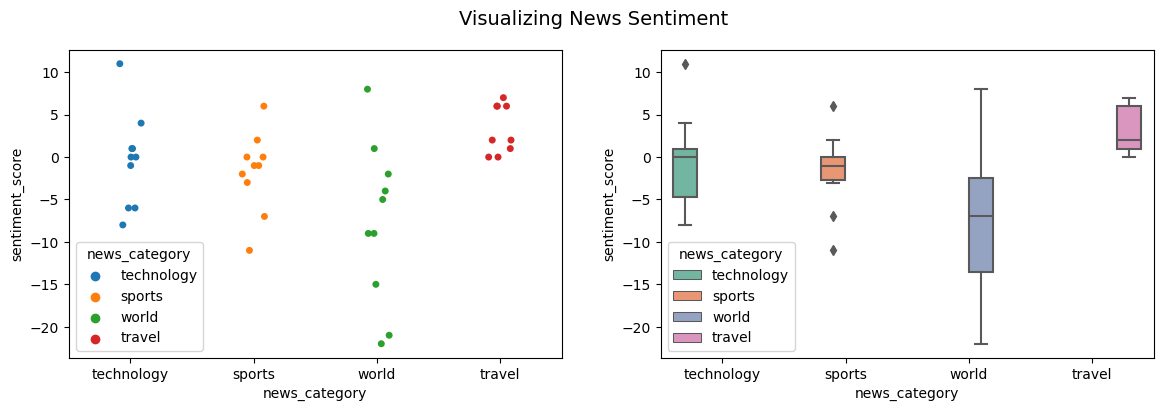

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

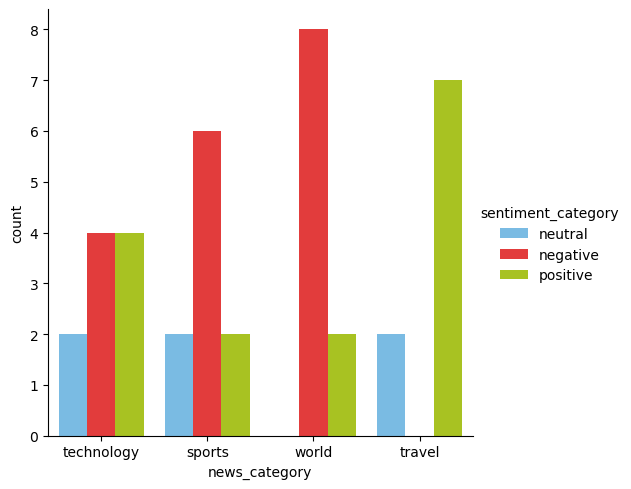

In [60]:
fc = sns.catplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [67]:
df.loc[(df['news_category']=='technology'),['sentiment_score']]

,sentiment_score
0,0.0
1,-1.0
2,-6.0
3,-8.0
4,1.0
5,1.0
6,0.0
7,4.0
8,11.0
9,-6.0


In [63]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 4)].index[0]

In [68]:
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -6.0)].index[0]

In [69]:
print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: The US government has proposed to ban Chinese-developed software from internet-connected cars in the country. Citing national security concerns, Commerce Secretary Gina Raimondo said that in an extreme situation, a foreign adversary could shut down their vehicles in US at the same time causing crashes and blocking roads. This could bar nearly all Chinese cars from entering the US market.

Most Positive Tech News Article: Several techies claimed using their browser's 'inspect element' feature to buy Coldplay's concert tickets on BookMyShow before they were available to general public. "Managed to find the "buy" ticket URL before it was available to public," a techie wrote on X. Another said, "Inspect element for the win" with a screenshot showing only one person ahead of them in queue.


In [70]:
df1 = df[df.news_category=='world']
pd.unique(df1.sentiment_score)

array([ -9., -22., -21., -15.,   1.,  -2.,   8.,  -5.,  -4.])

In [71]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 8)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -2.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: In his final speech at the United Nations General Assembly (UNGA) as US President, Joe Biden remarked that while Russian President Vladimir Putin's war "had failed at its core aim", Ukraine is still free. "[Putin] set out to weaken NATO, but NATO is bigger, stronger, more united than ever before, with two new members, Finland and Sweden," Biden said.

Most Positive World News Article: Thailand's marriage equality bill was written into law on Tuesday, allowing same-sex couples to wed from January 2025. The bill, which grants full legal, financial and medical rights for marriage partners of any gender, will make Thailand the third place in Asia, after Taiwan and Nepal, to allow same-sex marriage. "Congratulations to everyone's love," PM Paetongtarn Shinawatra wrote on X.


### Sentiment Analysis Using Textblob:

In [72]:
from textblob import TextBlob

In [73]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]

In [74]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [75]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                             \
                        count      mean       std    min      25%    50%   
news_category                                                              
sports                   10.0  0.053500  0.130833 -0.143  0.00000  0.014   
technology               10.0 -0.035400  0.169916 -0.320 -0.16250  0.034   
travel                    9.0  0.077889  0.131497 -0.150  0.04000  0.100   
world                    10.0  0.042900  0.106402 -0.108 -0.00975  0.021   

                               
                   75%    max  
news_category                  
sports         0.13800  0.250  
technology     0.07175  0.189  
travel         0.12500  0.320  
world          0.08525  0.225

In [76]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,0.035,positive
1,technology,-0.267,negative
2,technology,-0.050,negative
3,technology,-0.320,negative
4,technology,0.033,positive


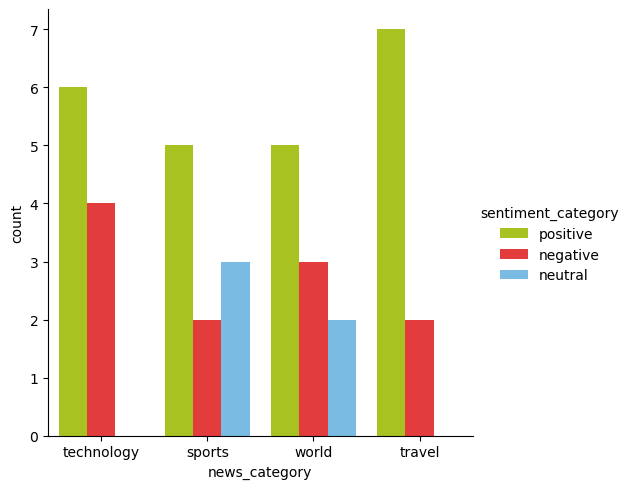

In [77]:
fc = sns.catplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [78]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: A 37-year-old man was arrested after he allegedly dug up some of his uncle's bones and used them to extort 5 billion Vietnamese dong (over ₹1.69 lakh) from his family to pay his gambling debts in Vietnam. The accused reportedly hid the remains in a nearby rubbish pile and then anonymously demanded money for the bones from his relative.

Most Positive World News Article: Son of the man accused of attempting to assassinate ex-US President Donald Trump in Florida, was arrested on charges of possessing child sexual abuse images. FBI agents reportedly found hundreds of the images while searching Oran Routh's house "in connection with an investigation unrelated to child exploitation", as per court papers. No attorney was listed for Oran in court papers.
